In [1]:
from new_stations import *
from time_series_model import *
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from scipy import signal
from scipy import stats








In [2]:
data, weather = load_data()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
data = feature_addition(data)

In [4]:
sf = model_city(data,1)

In [5]:
def month_sep(df, year, month):
    cdf = df[(df.year == year) & (df.month == month)]
    ndf = df[(df.year == year) & (df.month == (month-1))]
    return cdf, ndf

In [6]:
#cdf = current month df
#ndf = next month df
cdf, ndf = month_sep(sf, 2018, 4)

In [7]:
#proposed stations
ps = new_stn_coords(cdf, ndf)

In [49]:
ps

[155.0, 148.0, 163.0]

In [40]:
df1 = cdf

In [41]:
df2 = ndf

In [53]:
qtr = days_for_ts(sf, cdf,3)

/Users/michellehoang/galvanize/Capstone_Project/time_series_model.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tsdf['days'] = 1
/Users/michellehoang/galvanize/Capstone_Project/time_series_model.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tsdf['days'][tsdf.month == mon] = tsdf.day * mult
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:8672: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_i

In [54]:
qtr.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,day_of_week,date,year,month,day,hour,malfunction,age,days
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,No,2,2018-01-31,2018,1,31,22,False,33.0,31
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,2,2018-01-31,2018,1,31,16,False,NaN,31


In [55]:
(qtr.end_station_longitude == -122.2914153)&(qtr.end_station_latitude == 37.8107432)

0         False
1         False
3         False
4         False
6         False
7         False
8         False
10        False
11        False
12        False
15        False
16        False
17        False
23        False
25        False
26        False
29        False
30        False
31        False
32        False
33        False
34        False
36        False
37        False
38        False
39        False
41        False
42        False
43        False
44        False
          ...  
444011    False
444012    False
444013    False
444014    False
444015    False
444016    False
444019    False
444020    False
444021    False
444024    False
444026    False
444028    False
444029    False
444035    False
444042    False
444043    False
444044    False
444045    False
444047    False
444048    False
444050    False
444052    False
444058    False
444059    False
444062    False
444064    False
444065    False
444067    False
444068    False
444069    False
Name: end_station_longit

In [42]:
# def knn_proposed_stn(df1, df2, proposed_stn, num_neighbors = 3):
    
#all coords for current month df
coordinates = np.array(df1[['start_station_longitude', 'start_station_latitude']])

In [43]:
#unique coords for current month df
unique_coords = np.unique(coordinates, axis = 0)

In [46]:
#get the id and coords combinations for current/next month
id_coord_df1 = stn_coords(df1)
id_coord_df2 = stn_coords(df2)

In [52]:

#empty dict for station id and coordinate
knn_dict = {}

# for p in proposed_stn:

    #distance between first proposed station and everything else
distance = euclidean_distance(id_coord_df2.get(155), unique_coords)

#sort coords from closest to furthest
neighbors = unique_coords[np.argsort(distance)]
for ef in neighbors:
    if 
print(neighbors[0])
#     count = 0 
#     while count <= num_neighbors:
        
#         k = df.start_station_id[(df.start_station_longitude == id_coord_df2.get(p)[0]) &(df.start_station_latitude == id_coord_df2.get(p)[1])].iloc[0]
#     v = []
#     for i in range(num_neighbors):
#         knn_id = df1.start_station_id[(df1.start_station_longitude == neighbors[i][0]) &(df1.start_station_latitude == neighbors[i][1])].iloc[0]
#         v.append(int(knn_id))
#     knn_dict[int(p)] = v
# #     return knn_dict, id_coord_df1

[-122.2914153   37.8107432]


In [38]:
#neighbors for each proposed location
#id and coordinate combo for each station
neighbors, id_coord= knn_proposed_stn(cdf, ndf, ps)

In [39]:
neighbors

{155: [231, 7, 239], 148: [231, 7, 239], 163: [231, 230, 239]}

In [12]:
# t = 230
# print("The origin station is {}.".format(t))
# print("The 3 closest neighbors are: {}, {}, {}".format(int(neighbors.get(t)[0]),int(neighbors.get(t)[1]),int(neighbors.get(t)[2])))
# plt.figure(figsize = (10,10))
# ll,rr = -122.50, -122.36
# bb = 37.73
# plt.xlim(ll,rr)
# plt.ylim(bb, bb+(rr-ll))
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Map of Ford GoBike stations in San Francisco")
# plt.scatter(qtr.end_station_longitude, qtr.end_station_latitude, s=1, c=('r'))
# plt.scatter(id_coord.get(t)[0], id_coord.get(t)[1], s=20, marker='x', c=('b'))

# for st in neighbors.get(t):
#     plt.scatter(id_coord.get(st)[0],id_coord.get(st)[1], s= 10, c='g')
# plt.show()



In [13]:
ts = days_count(qtr, 28)

In [14]:
tseries = pd.Series(ts[:,1])

In [15]:
test = sm.tsa.stattools.adfuller(tseries)
print("ADF p-value: {0:2.2f}".format(test[1]))

ADF p-value: 0.76


In [16]:
tseries_diffed = tseries.diff()[1:]

In [17]:
sm.tsa.stattools.adfuller(tseries_diffed)[1]

8.546153703655687e-09

In [18]:
sm.tsa.stattools.adfuller(tseries_diffed)[1]>0.05

False

In [19]:
def stationary_convert(series, pvalue=0.05):
    test = sm.tsa.stattools.adfuller(series)
    if test[1] > pvalue:
        tseries_diffed = tseries.diff()[1:]
        return tseries_diffed
    return series

In [20]:
trip_matrix = tseries.as_matrix()
trip_matrix

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 16,  67,  40,  86,  21,  58,  11,  43,  35,  65,  31, 102,  10,
        50,  34, 103,  40,  73,  25,  77,  37,  37,  36,  86,  24,  65,
        40,  56,  38,  83,  37,  37,  25,  18,  64,   9,  20,  54,  59,
        41,  16,  21,  81,   5,   9,  49,  34,  35,  25,  24,  27,  20,
        15,  25,  20,  42,  11,  22,  25,  24,  24,  56,  35,  13,  34,
        33,  29,  32,  48,  29,  35,  22,  34,  35])

In [21]:
trip_model = ARIMA(trip_matrix, order=(3, 1, 0)).fit()

In [22]:
predictions = trip_model.predict(75, 85, typ='levels')
predictions

array([31.92506524, 26.83682867, 32.80513055, 31.3334511 , 30.62499936,
       28.27070611, 31.18011506, 29.52909591, 29.65096089, 28.29254929,
       29.70831335, 28.39198003])

In [23]:
test = np.append(trip_matrix, predictions)

In [24]:
test1 = pd.Series(test)

In [25]:
test1

0      16.000000
1      67.000000
2      40.000000
3      86.000000
4      21.000000
5      58.000000
6      11.000000
7      43.000000
8      35.000000
9      65.000000
10     31.000000
11    102.000000
12     10.000000
13     50.000000
14     34.000000
15    103.000000
16     40.000000
17     73.000000
18     25.000000
19     77.000000
20     37.000000
21     37.000000
22     36.000000
23     86.000000
24     24.000000
25     65.000000
26     40.000000
27     56.000000
28     38.000000
29     83.000000
         ...    
56     11.000000
57     22.000000
58     25.000000
59     24.000000
60     24.000000
61     56.000000
62     35.000000
63     13.000000
64     34.000000
65     33.000000
66     29.000000
67     32.000000
68     48.000000
69     29.000000
70     35.000000
71     22.000000
72     34.000000
73     35.000000
74     31.925065
75     26.836829
76     32.805131
77     31.333451
78     30.624999
79     28.270706
80     31.180115
81     29.529096
82     29.650961
83     28.2925

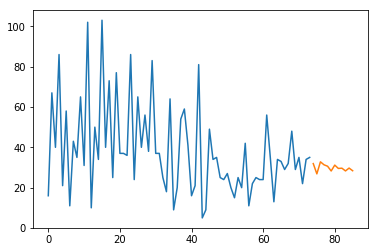

In [26]:
plt.plot(test1.index[0:74], test1[0:74])
plt.plot(test1.index[74:], test1[74:])


In [27]:
def ARIMA_pred(arr, p=3, d=1, q=0):
    tseries = pd.Series(arr[:,1])
    test = sm.tsa.stattools.adfuller(tseries)
    trip_matrix = tseries.as_matrix()
    trip_model = ARIMA(trip_matrix, order=(p, d, q)).fit()
    
    sze = len(tseries)
    predictions = trip_model.predict(sze, sze+30, typ='levels')
    test = np.append(trip_matrix, predictions)
    test1 = pd.Series(test)
    plt.plot(test1.index[:sze], test1[:sze])
    plt.plot(test1.index[sze:], test1[sze:])
    return predictions



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([31.92506524, 26.83682867, 32.80513055, 31.3334511 , 30.62499936,
       28.27070611, 31.18011506, 29.52909591, 29.65096089, 28.29254929,
       29.70831335, 28.39198003, 28.68278473, 27.74893736, 28.43022705,
       27.45818977, 27.6872696 , 26.98040629, 27.28488495, 26.56569353,
       26.68119522, 26.11917405, 26.21744619, 25.66644965, 25.67823967,
       25.21616606, 25.19365219, 24.75116989, 24.68371858, 24.2917233 ,
       24.19440484])

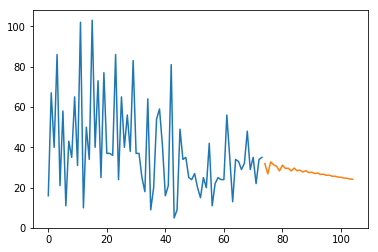

In [28]:
ARIMA_pred(ts,3,1,0)

In [29]:
def plt_stn():
    row_sze = len(neighbors)
    col_sze = len(next(iter(neighbors.values())))
    rnge = row_sze*col_sze
    fig = plt.figure(figsize=(10,10))
    graph = 1
    for k, v in neighbors.items():
        num = 1
        for s_id in v:
            plt.subplot(rnge,1,graph)
            plt.subplots_adjust(top=6, bottom =0.1)
            plt.xlim(0,90)
            plt.xlabel("days")
            plt.ylabel("trips per day")
            plt.title("This is station {}, and it is neighbor #{} for station {}".format(s_id, num, k))
            ts = days_count(qtr, s_id)
            plt.plot(ts[:,0],ts[:,1])
            num+=1
            graph+=1
#             ARIMA_pred(ts)

In [31]:
# #Print MSE to see how good the model is
# Error = mean_squared_error(TestData, Predictions)
# print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# # plot
# pyplot.plot(TestData)
# pyplot.plot(Predictions, color='red')
# pyplot.show()

In [32]:
# #in a for loop, predict values using ARIMA model
# for timepoint in range(len(TestData)):
#     ActualValue =  TestData[timepoint]
#     #forcast value
#     Prediction = StartARIMAForecasting(Actual, 3,1,0)    
#     print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
#     Predictions.append(Prediction)
#     Actual.append(ActualValue)